In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
import statsmodels.formula.api as sm

In [3]:
df=pd.read_csv("Salary_Data (1).csv")

In [4]:
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [6]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [19]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [7]:
df_new=df.rename({"YearsExperience":"experience","Salary":"salary"},axis=1)
df_new

,experience,salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


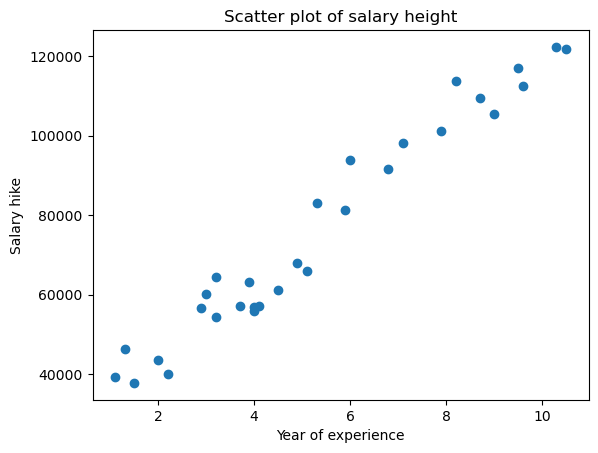

In [10]:
#plot scatter plot of feature and target
plt.scatter(df_new["experience"],df_new["salary"])
plt.xlabel("Year of experience")
plt.ylabel("Salary hike")
plt.title("Scatter plot of salary height")
plt.show()

In [11]:
df_new.corr()

,experience,salary
experience,1.000000,0.978242
salary,0.978242,1.000000


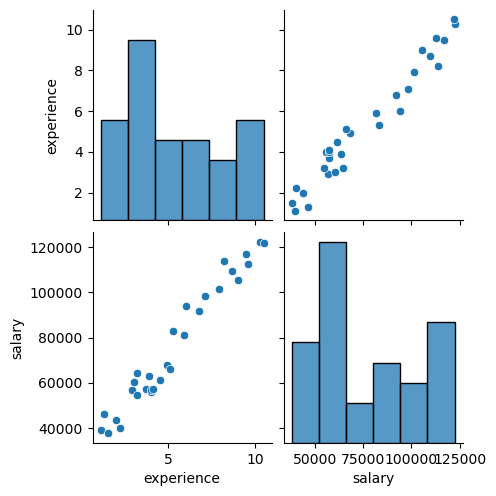

In [12]:
sn.pairplot(df_new)

C:\Users\Dell\anaconda3.1\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Dell\anaconda3.1\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='salary', ylabel='Density'>

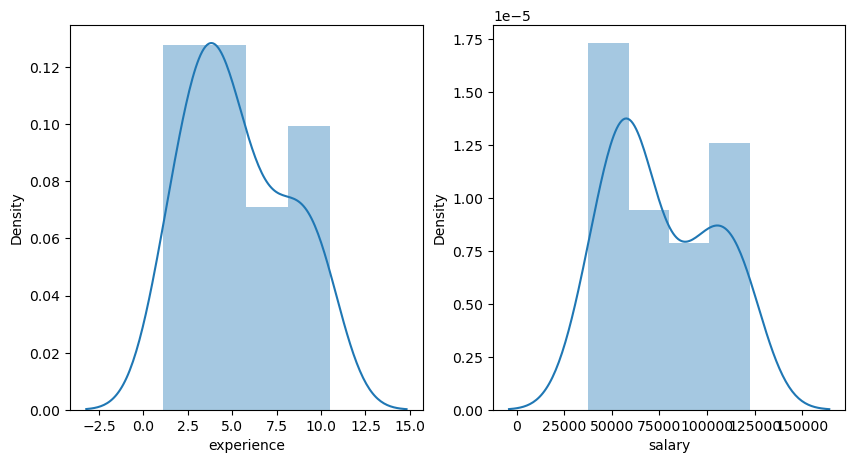

In [13]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sn.distplot(df_new["experience"])
plt.subplot(1,2,2)
sn.distplot(df_new["salary"])


In [15]:
df_new.skew()

experience    0.37956
salary        0.35412
dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x1278b30b8e0>,
 'caps': [<matplotlib.lines.Line2D at 0x1278b30bd60>,
 'boxes': [<matplotlib.lines.Line2D at 0x1278b30b610>],
 'medians': [<matplotlib.lines.Line2D at 0x1278b319340>],
 'fliers': [<matplotlib.lines.Line2D at 0x1278b319610>],
 'means': []}

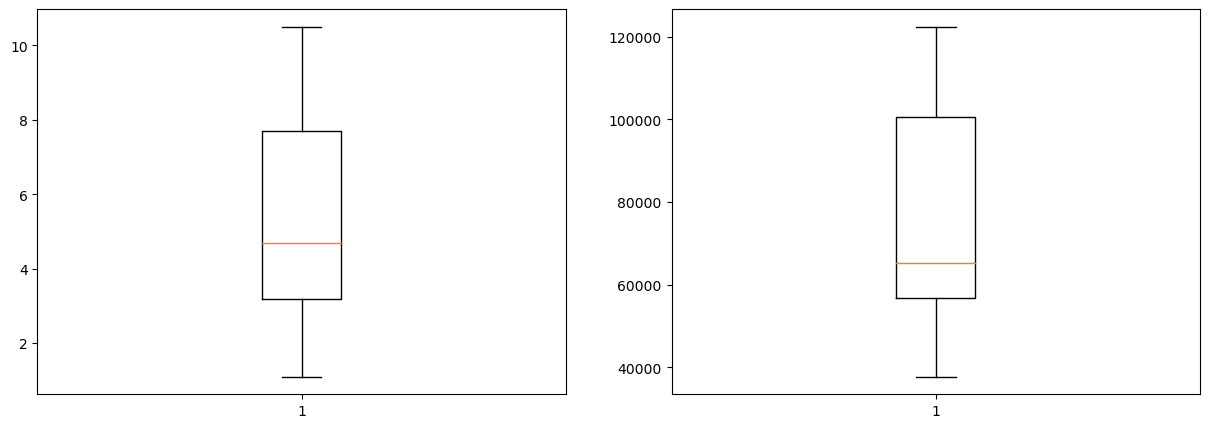

In [14]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.boxplot(df_new["experience"])
plt.subplot(1,2,2)
plt.boxplot(df_new["salary"])

In [16]:
##OLS (ordinary least square)method call
model=sm.ols("salary~experience",data=df_new).fit()

In [17]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Fri, 10 Mar 2023   Prob (F-statistic):           1.14e-20
Time:                        12:53:33   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
experience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
model.params

Intercept     25792.200199
experience     9449.962321
dtype: float64

In [20]:
model.tvalues,model.pvalues

(Intercept     11.346940
 experience    24.950094
 dtype: float64,
 Intercept     5.511950e-12
 experience    1.143068e-20
 dtype: float64)

In [21]:
model.rsquared , model.rsquared_adj

(0.9569566641435086, 0.9554194021486339)

In [24]:
salary_pred1=(25792.200)+(9449.96)*(1.1)
salary_pred1

36187.156

<AxesSubplot:xlabel='experience', ylabel='salary'>

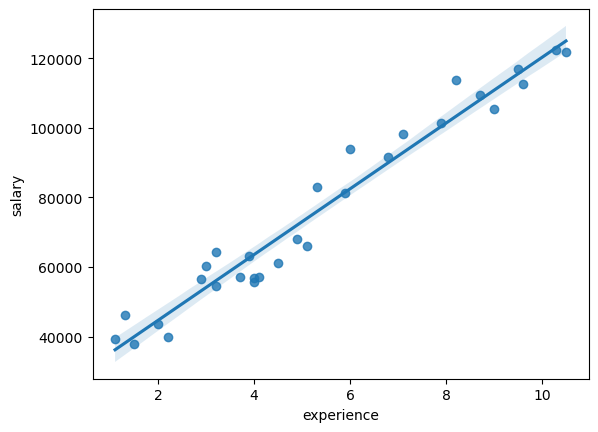

In [25]:
sn.regplot(x=df_new['experience'],y=df_new['salary'])

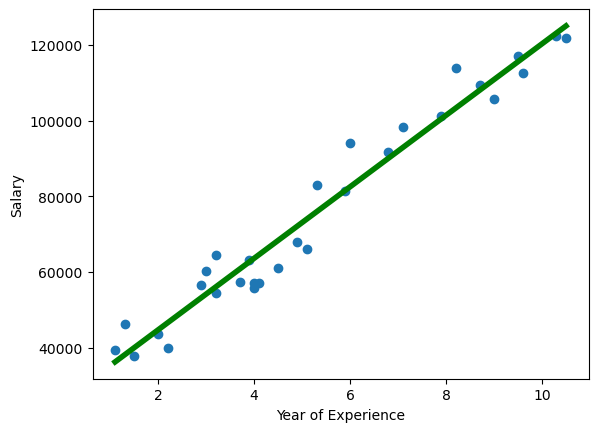

In [28]:
##best fit line
plt.scatter(x=df_new['experience'],y=df_new['salary'])
y_pred=(25792.200)+(9449.96)*(df_new["experience"])
fig=plt.plot(df_new["experience"],y_pred,lw=4, c='green', label ='regression line')
plt.xlabel("Year of Experience")
plt.ylabel("Salary");

In [29]:
data_new=pd.Series([5,6])
data_new

0    5
1    6
dtype: int64

In [30]:
data_pred=pd.DataFrame(data=data_new,columns=["experience"])
data_pred

,experience
0,5
1,6


In [31]:
y_pred1=(25792.200199)+(9449.962321)*(data_pred)
y_pred1

,experience
0,73042.011804
1,82491.974125


In [32]:
print("MAE",mean_absolute_error(df_new["salary"],y_pred))

MAE 4644.200533333334


In [35]:
model.rsquared , model.rsquared_adj

(0.9569566641435086, 0.9554194021486339)

# Transformation

# 1.squareroot 

In [37]:
df_new_sqr_ex=np.sqrt(df_new["experience"])
df_new_sqr_ex

0     1.048809
1     1.140175
2     1.224745
3     1.414214
4     1.483240
5     1.702939
6     1.732051
7     1.788854
8     1.788854
9     1.923538
10    1.974842
11    2.000000
12    2.000000
13    2.024846
14    2.121320
15    2.213594
16    2.258318
17    2.302173
18    2.428992
19    2.449490
20    2.607681
21    2.664583
22    2.810694
23    2.863564
24    2.949576
25    3.000000
26    3.082207
27    3.098387
28    3.209361
29    3.240370
Name: experience, dtype: float64

In [38]:
df_new_sqr_sal=np.sqrt(df_new["salary"])
df_new_sqr_sal

0     198.350700
1     214.953483
2     194.244691
3     208.626460
4     199.727314
5     237.995798
6     245.254969
7     233.334524
8     253.860198
9     239.142217
10    251.431899
11    236.207536
12    238.656657
13    238.916303
14    247.206392
15    260.649190
16    256.961087
17    288.249892
18    285.242003
19    306.496330
20    302.882816
21    313.485247
22    318.279751
23    337.360341
24    330.803567
25    324.933839
26    342.007310
27    335.611382
28    349.844251
29    349.101704
Name: salary, dtype: float64

In [44]:
df_new_sqr=pd.DataFrame(data=(df_new_sqr_ex,df_new_sqr_sal)).T

In [45]:
df_new_sqr

,experience,salary
0,1.048809,198.350700
1,1.140175,214.953483
2,1.224745,194.244691
3,1.414214,208.626460
4,1.483240,199.727314
5,1.702939,237.995798
6,1.732051,245.254969
7,1.788854,233.334524
8,1.788854,253.860198
9,1.923538,239.142217


C:\Users\Dell\anaconda3.1\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Dell\anaconda3.1\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='salary', ylabel='Density'>

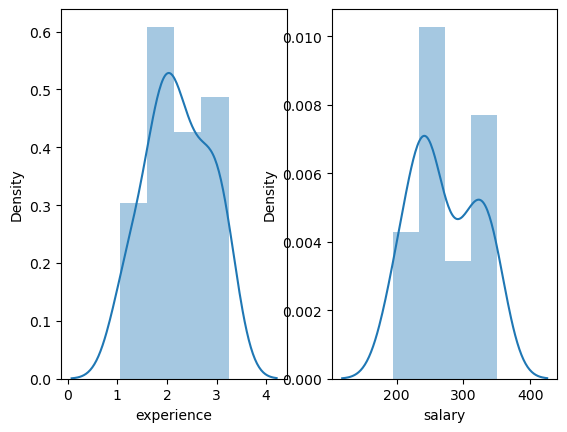

In [40]:
plt.subplot(1,2,1)
sn.distplot(df_new_sqr_ex)
plt.subplot(1,2,2)
sn.distplot(df_new_sqr_sal)

In [47]:
model_sqr=sm.ols("salary~experience",data=df_new_sqr).fit()

In [49]:
model_sqr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     454.3
Date:                Fri, 10 Mar 2023   Prob (F-statistic):           7.58e-19
Time:                        13:31:07   Log-Likelihood:                -116.52
No. Observations:                  30   AIC:                             237.0
Df Residuals:                      28   BIC:                             239.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    103.5680      8.178     12.663      0.000      86.815     120.321
experience    75.6269      3.548     21.315      0.000      68.359      82.895
==============================================================================
Omnibus:                        0.924   Durbin-Watson:                   1.362
Prob(Omnibus):                  0.630   Jarque-Bera (JB):                0.801
Skew:                           0.087   Prob(JB):                        0.670
Kurtosis:                       2.219   Cond. No.                         9.97
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
model_sqr.rsquared

0.9419490138976825

In [51]:
model_sqr.rsquared_adj

0.9398757643940283

 Model Perfromace of after doing squareroot transformation is approx.. 94%

# Log Transformation

In [53]:
df_new_log_exp=np.log(df_new["experience"])
df_new_log_exp

0     0.095310
1     0.262364
2     0.405465
3     0.693147
4     0.788457
5     1.064711
6     1.098612
7     1.163151
8     1.163151
9     1.308333
10    1.360977
11    1.386294
12    1.386294
13    1.410987
14    1.504077
15    1.589235
16    1.629241
17    1.667707
18    1.774952
19    1.791759
20    1.916923
21    1.960095
22    2.066863
23    2.104134
24    2.163323
25    2.197225
26    2.251292
27    2.261763
28    2.332144
29    2.351375
Name: experience, dtype: float64

In [55]:
df_new_log_sal=np.log(df_new["salary"])
df_new_log_sal

0     10.580073
1     10.740843
2     10.538237
3     10.681091
4     10.593906
5     10.944506
6     11.004597
7     10.904946
8     11.073567
9     10.954117
10    11.054344
11    10.929422
12    10.950052
13    10.952227
14    11.020447
15    11.126351
16    11.097849
17    11.327656
18    11.306676
19    11.450412
20    11.426692
21    11.495505
22    11.525861
23    11.642303
24    11.603049
25    11.567243
26    11.669664
27    11.631908
28    11.714976
29    11.710727
Name: salary, dtype: float64

In [57]:
df_new_log=pd.DataFrame(data=(df_new_log_exp,df_new_log_sal)).T
df_new_log

,experience,salary
0,0.095310,10.580073
1,0.262364,10.740843
2,0.405465,10.538237
3,0.693147,10.681091
4,0.788457,10.593906
5,1.064711,10.944506
6,1.098612,11.004597
7,1.163151,10.904946
8,1.163151,11.073567
9,1.308333,10.954117


C:\Users\Dell\anaconda3.1\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Dell\anaconda3.1\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='salary', ylabel='Density'>

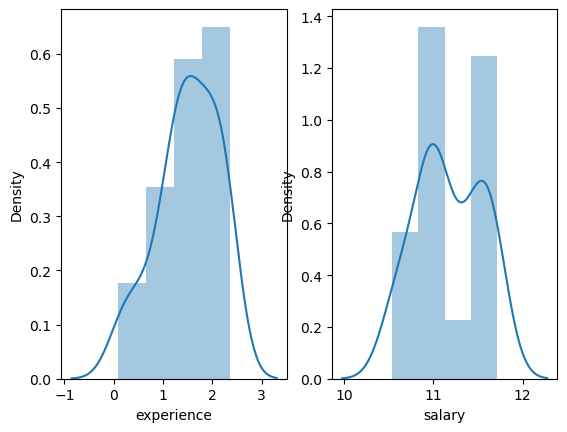

In [58]:
plt.subplot(1,2,1)
sn.distplot(df_new_log_exp)
plt.subplot(1,2,2)
sn.distplot(df_new_log_sal)

In [60]:
df_new_log.skew()

experience   -0.600565
salary       -0.044126
dtype: float64

In [62]:
model_log=sm.ols("salary~experience",data=df_new_log).fit()

In [64]:
model_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     267.4
Date:                Fri, 10 Mar 2023   Prob (F-statistic):           7.40e-16
Time:                        13:38:22   Log-Likelihood:                 23.209
No. Observations:                  30   AIC:                            -42.42
Df Residuals:                      28   BIC:                            -39.61
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.3280      0.056    184.868      0.000      10.214      10.442
experience     0.5621      0.034     16.353      0.000       0.492       0.632
==============================================================================
Omnibus:                        0.102   Durbin-Watson:                   0.988
Prob(Omnibus):                  0.950   Jarque-Bera (JB):                0.297
Skew:                           0.093   Prob(JB):                        0.862
Kurtosis:                       2.549   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [65]:
model_log.rsquared,model_log.rsquared_adj

(0.9052150725817149, 0.9018298966024904)

Model perfirmance after the log transformation is reduces to 90% so log transformation is not good for this model

# Conclusion

1.p<0.05 then the model is accpected

2.when the experience increases then salary will increases linearly